In [1]:
import pandas as pd
import numpy as np
from datetime import date
import re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings

import feature_generation as fg
import imputation as imp
import evaluation as eva
import train_test_split as tts
import clf_define as clfd
import data_util as util
import unsupervised as uns

The functionality should include:
1. load data from a csv
2. process the data so it’s ready for clustering

The data has already been preprocessed and ready for clustering

In [2]:
data = pd.read_pickle("test_k")
sub_data = pd.read_pickle("sub_test_k")

3. Given a k, generate k clusters using one of the clustering methods (k-means is fine for this)

We first analyze the case of the largest training dataset, which will also be used for the test of the function.

In [3]:
new_df = uns.k_mean_analysis(data, 2, "label")

not allow to plot in 2D


The result of the clustering using Kmeans is presented as below

In [4]:
new_df.head()

,total_price_including_optional_support,students_reached,school_metro==urban,school_metro==others,school_metro==suburban,school_metro==unknown,grade_level==Grades PreK-2,grade_level==others,grade_level==Grades 3-5,grade_level==Grades 6-8,...,primary_focus_subject==Mathematics,primary_focus_area==Literacy & Language,primary_focus_area==others,primary_focus_area==Math & Science,primary_focus_area==Music & The Arts,resource_type==Technology,resource_type==others,resource_type==Supplies,resource_type==Books,label
0,0.013967,0.002471,1,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,1,0,1
1,0.001891,0.002224,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
2,0.009139,0.004530,1,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,0.000827,0.001812,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0.034745,0.012271,0,0,1,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1


For each cluster:
* A. Provide summary stats for the cluster
* B. Describe (using statistics, graphs, or any other visualizations) what types of data points are in this cluster
* C. what are the distinctive features of data points in this cluster (you might want to use 

The plot of the clustering can be generated if the restricted the number of columns to 2

C:\Users\Yang Ta Yun\MLHW4\unsupervised.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[label_col] = pd.Series(kmeans.labels_)


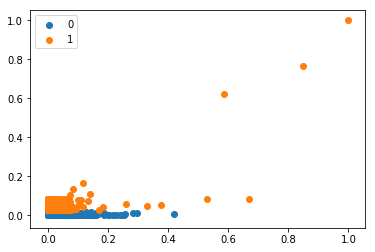

In [5]:
gra1 = uns.k_mean_analysis(data[["total_price_including_optional_support", "students_reached"]], 2, "label", plot=True)

C:\Users\Yang Ta Yun\MLHW4\unsupervised.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[label_col] = pd.Series(kmeans.labels_)


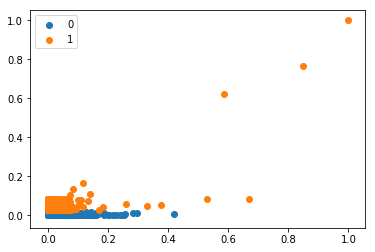

In [6]:
gra2 = uns.k_mean_analysis(data[["total_price_including_optional_support", "students_reached"]], 2, "secondary_focus_subject==unknown", plot=True)

The summary statistics of different label is provided as the following

In [7]:
uns.summarize_clusters(new_df, "label")['label = 0']

,total_price_including_optional_support,students_reached,school_metro==urban,school_metro==others,school_metro==suburban,school_metro==unknown,grade_level==Grades PreK-2,grade_level==others,grade_level==Grades 3-5,grade_level==Grades 6-8,...,primary_focus_subject==Mathematics,primary_focus_area==Literacy & Language,primary_focus_area==others,primary_focus_area==Math & Science,primary_focus_area==Music & The Arts,resource_type==Technology,resource_type==others,resource_type==Supplies,resource_type==Books,label
count,26340.000000,26340.000000,26340.000000,26340.0,26340.000000,26340.000000,26340.000000,26340.0,26340.000000,26340.000000,...,26340.000000,26340.000000,26340.0,26340.000000,26340.000000,26340.000000,26340.0,26340.000000,26340.000000,26340.0
mean,0.004817,0.008229,0.499506,0.0,0.256948,0.125133,0.359605,0.0,0.283030,0.190053,...,0.144837,0.439180,0.0,0.255277,0.108770,0.279727,0.0,0.377221,0.219476,0.0
std,0.010879,0.015484,0.500009,0.0,0.436959,0.330876,0.479894,0.0,0.450479,0.392350,...,0.351943,0.496297,0.0,0.436025,0.311356,0.448873,0.0,0.484700,0.413900,0.0
min,0.000070,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
25%,0.002227,0.001812,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
50%,0.003818,0.002635,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
75%,0.005538,0.008730,1.000000,0.0,1.000000,0.000000,1.000000,0.0,1.000000,0.000000,...,0.000000,1.000000,0.0,1.000000,0.000000,1.000000,0.0,1.000000,0.000000,0.0
max,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,...,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0


In [8]:
uns.summarize_clusters(new_df, "label")['label = 1']

,total_price_including_optional_support,students_reached,school_metro==urban,school_metro==others,school_metro==suburban,school_metro==unknown,grade_level==Grades PreK-2,grade_level==others,grade_level==Grades 3-5,grade_level==Grades 6-8,...,primary_focus_subject==Mathematics,primary_focus_area==Literacy & Language,primary_focus_area==others,primary_focus_area==Math & Science,primary_focus_area==Music & The Arts,resource_type==Technology,resource_type==others,resource_type==Supplies,resource_type==Books,label
count,54469.000000,54469.000000,54469.000000,54469.0,54469.000000,54469.000000,54469.000000,54469.0,54469.000000,54469.000000,...,54469.000000,54469.000000,54469.0,54469.000000,54469.000000,54469.000000,54469.0,54469.000000,54469.000000,54469.0
mean,0.005305,0.007378,0.522169,0.0,0.251060,0.112284,0.398741,0.0,0.325763,0.161964,...,0.120821,0.456590,0.0,0.238374,0.084654,0.385485,0.0,0.312563,0.187666,1.0
std,0.008247,0.012717,0.499513,0.0,0.433627,0.315719,0.489644,0.0,0.468664,0.368421,...,0.325922,0.498117,0.0,0.426093,0.278368,0.486714,0.0,0.463542,0.390449,0.0
min,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.0
25%,0.002551,0.001730,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.0
50%,0.004160,0.002388,1.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.0
75%,0.006217,0.007330,1.000000,0.0,1.000000,0.000000,1.000000,0.0,1.000000,0.000000,...,0.000000,1.000000,0.0,0.000000,0.000000,1.000000,0.0,1.000000,0.000000,1.0
max,0.668956,0.106984,1.000000,0.0,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,...,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.0


The determined feature in the cluster can be discovered by the decision tree model with limited max_depth, in the following cases, we will specified the max_depth to 1 using best seperation with gini score. This gives us the feature which creates the highest information gain. The tree can be observed in file "DT1"

In [10]:
features = list(new_df.columns)
features.remove("label")
DT1 = uns.simple_tree(new_df, features, "label")
uns.depict_decision_tree(DT1, features, "label", "DT1")

Allow the user to
* A. merge several clusters into one
* B. recluster with a new k
* C. Split a specific cluster into many (with a specific number of new clustering)

We than want to test if our pipeline is able to re-do, combine and seperate the clusters

In [11]:
uns.recluser(new_df, "label", 2).head()

,total_price_including_optional_support,students_reached,school_metro==urban,school_metro==others,school_metro==suburban,school_metro==unknown,grade_level==Grades PreK-2,grade_level==others,grade_level==Grades 3-5,grade_level==Grades 6-8,...,primary_focus_subject==Mathematics,primary_focus_area==Literacy & Language,primary_focus_area==others,primary_focus_area==Math & Science,primary_focus_area==Music & The Arts,resource_type==Technology,resource_type==others,resource_type==Supplies,resource_type==Books,label
0,0.013967,0.002471,1,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,1,0,1
1,0.001891,0.002224,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
2,0.009139,0.004530,1,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,0.000827,0.001812,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0.034745,0.012271,0,0,1,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1


In [12]:
uns.cluster_splitter(new_df, "label", 0, 2).head()["new_label"]

not allow to plot in 2D


C:\Users\Yang Ta Yun\MLHW4\unsupervised.py:246: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  preserve_df["tmp_" + label_col] = preserve_df[label_col]


3    10.0
5    10.0
6    11.0
7    11.0
9    11.0
Name: new_label, dtype: float64

In [13]:
uns.cluster_combiner(new_df, "label", [0,1], 0).head()["label"]

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int32

Then we focus on analzing the 5% riskiest cases.

In [14]:
new_subdf = uns.k_mean_analysis(sub_data, 2, "label")

not allow to plot in 2D


In [15]:
new_subdf.head()

,total_price_including_optional_support,students_reached,school_metro==urban,school_metro==others,school_metro==unknown,school_metro==suburban,grade_level==Grades PreK-2,grade_level==others,grade_level==Grades 3-5,grade_level==Grades 6-8,...,primary_focus_area==Literacy & Language,primary_focus_area==others,primary_focus_area==Music & The Arts,primary_focus_area==Math & Science,resource_type==Technology,resource_type==others,resource_type==Supplies,resource_type==Books,y_predp,label
0,0.008315,0.001977,0,0,0,1,1,0,0,0,...,1,0,0,0,1,0,0,0,0.796652,0
1,0.008316,0.001565,1,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0.781070,0
2,0.009736,0.002059,0,0,0,1,1,0,0,0,...,1,0,0,0,1,0,0,0,0.775244,0
3,0.016978,0.002553,1,0,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0.775194,1
4,0.015798,0.006095,0,0,0,1,0,0,0,1,...,1,0,0,0,1,0,0,0,0.773354,1


In [16]:
uns.summarize_clusters(new_subdf, "label")['label = 0']

,total_price_including_optional_support,students_reached,school_metro==urban,school_metro==others,school_metro==unknown,school_metro==suburban,grade_level==Grades PreK-2,grade_level==others,grade_level==Grades 3-5,grade_level==Grades 6-8,...,primary_focus_area==Literacy & Language,primary_focus_area==others,primary_focus_area==Music & The Arts,primary_focus_area==Math & Science,resource_type==Technology,resource_type==others,resource_type==Supplies,resource_type==Books,y_predp,label
count,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,...,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.0
mean,0.014220,0.008601,0.366699,0.084697,0.084697,0.463908,0.342637,0.106833,0.432146,0.118383,...,0.626564,0.199230,0.009625,0.164581,0.827719,0.043311,0.073147,0.055823,0.611447,0.0
std,0.021949,0.015315,0.482135,0.278564,0.278564,0.498936,0.474820,0.309050,0.495613,0.323217,...,0.483949,0.399614,0.097679,0.370981,0.377806,0.203654,0.260503,0.229690,0.040700,0.0
min,0.002299,0.000247,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.562831,0.0
25%,0.007694,0.001730,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.579436,0.0
50%,0.009284,0.002388,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.600552,0.0
75%,0.015785,0.007330,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.634231,0.0
max,0.533149,0.082194,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.796652,0.0


In [17]:
uns.summarize_clusters(new_subdf, "label")['label = 1']

,total_price_including_optional_support,students_reached,school_metro==urban,school_metro==others,school_metro==unknown,school_metro==suburban,grade_level==Grades PreK-2,grade_level==others,grade_level==Grades 3-5,grade_level==Grades 6-8,...,primary_focus_area==Literacy & Language,primary_focus_area==others,primary_focus_area==Music & The Arts,primary_focus_area==Math & Science,resource_type==Technology,resource_type==others,resource_type==Supplies,resource_type==Books,y_predp,label
count,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,...,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.0
mean,0.013606,0.009305,0.158756,0.196399,0.127660,0.517185,0.281506,0.252046,0.253682,0.212766,...,0.500818,0.232406,0.004910,0.261866,0.685761,0.072013,0.137480,0.104746,0.614926,1.0
std,0.015010,0.012592,0.365748,0.397600,0.333984,0.500114,0.450102,0.434543,0.435475,0.409599,...,0.500409,0.422712,0.069956,0.440010,0.464592,0.258721,0.344635,0.306477,0.041252,0.0
min,0.002462,0.000247,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.562841,1.0
25%,0.006679,0.001894,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.582454,1.0
50%,0.008902,0.004694,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.606093,1.0
75%,0.015536,0.011942,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.636959,1.0
max,0.117197,0.082194,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.775194,1.0


In [18]:
features = list(new_subdf.columns)
features.remove("label")
DT2 = uns.simple_tree(new_subdf, features, "label", 3)
uns.depict_decision_tree(DT2, features, "label", "DT2")

Finally, we use the skill of multidimensional scaling for all features to verify if the clustering task is done in reasonal pattern.

In [19]:
mdims = uns.dimension_reduction(new_subdf, 2000, category_feature="label", n_components=3, n_jobs=2)

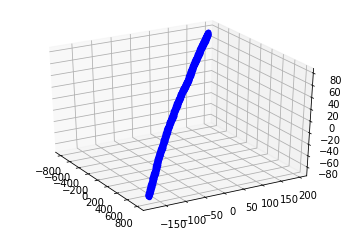

In [20]:
uns.depict_mds_plot(mdims[0], 30)